# Text Classification Using Bag-of-Words

- Naive Bayes is a common traditional machine learning algorithm for classification task.
- Important assumptions behind Naive Bayes:
    - Features are independent of each other
    - Features have equal contributions to the prediction
- When applying Naive Bayes to text data, we need to convert text data into numeric features.
    - bag-of-words model
    - vectorization issues
    - Fine tune the vectorizing features for better representation of the texts
- Applications
    - Text Classification
- Issues
    - Fail to consider the sequential orders of words in texts

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

## Fetech Data

In [2]:
data = fetch_20newsgroups()

In [3]:
print(type(data))
print(len(data.filenames)) # doc num

<class 'sklearn.utils.Bunch'>
11314


In [4]:
text_categories = data.target_names
print(len(text_categories)) # total number of text categories

20


## Train-Test Split

In [5]:
train_data = fetch_20newsgroups(subset="train", categories = text_categories)
test_data = fetch_20newsgroups(subset="test", categories = text_categories)

In [6]:
print("There are {} unique classes (text categories)".format(len(text_categories)))
print("Training Sample Size: {}".format(len(train_data.data)))
print("Test Sample Size: {}".format(len(test_data.data)))

There are 20 unique classes (text categories)
Training Sample Size: 11314
Test Sample Size: 7532


## Data Inspection

In [7]:
print(train_data.data[5][:200])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tav


## Building Pipeline

- The modeling pipeline should include:
    - text transformation (vectorization)
    - naive bayes modeling

In [28]:
%%time
# Build model pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=1))
# Train the model using training data
model.fit(train_data.data, train_data.target)
# Predict the classes of test data
predicted_categories = model.predict(test_data.data)

CPU times: user 4.57 s, sys: 75.3 ms, total: 4.65 s
Wall time: 4.65 s


## Other Models


In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
%%time
model_lr = make_pipeline(TfidfVectorizer(),LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42))
model_lr.fit(train_data.data, train_data.target)
# Predict the classes of test data
predicted_categories_lr = model_lr.predict(test_data.data)

CPU times: user 1min 54s, sys: 14.1 s, total: 2min 8s
Wall time: 49.5 s


In [33]:
%%time
model_rf = make_pipeline(TfidfVectorizer(),
                     RandomForestClassifier(n_estimators=20))
model_rf.fit(train_data.data, train_data.target)
# Predict the classes of test data
predicted_categories_rf = model_rf.predict(test_data.data)

CPU times: user 12.6 s, sys: 101 ms, total: 12.7 s
Wall time: 12.8 s


In [34]:
%%time
model_gb = make_pipeline(TfidfVectorizer(),
                         GradientBoostingClassifier(
                             n_estimators=20, random_state=42))

model_gb.fit(train_data.data, train_data.target)
# Predict the classes of test data
predicted_categories_gb = model_gb.predict(test_data.data)

CPU times: user 4min, sys: 1.44 s, total: 4min 1s
Wall time: 4min 5s


## Evaluation

```{note}
By default, the confusion matrix indicates the correct labels on the rows and predicted labels on the columns.
```

In [35]:
accuracy_score(test_data.target, predicted_categories)

0.7738980350504514

In [36]:
print('Logistic Regression:' ,accuracy_score(test_data.target, predicted_categories_lr))
print('Random Forest:' ,accuracy_score(test_data.target, predicted_categories_rf))
print('Gradient Boost:' ,accuracy_score(test_data.target, predicted_categories_gb))


Logistic Regression: 0.8274030801911842
Random Forest: 0.657328730748805
Gradient Boost: 0.6988847583643123


In [39]:
mat = confusion_matrix(test_data.target, predicted_categories_lr)

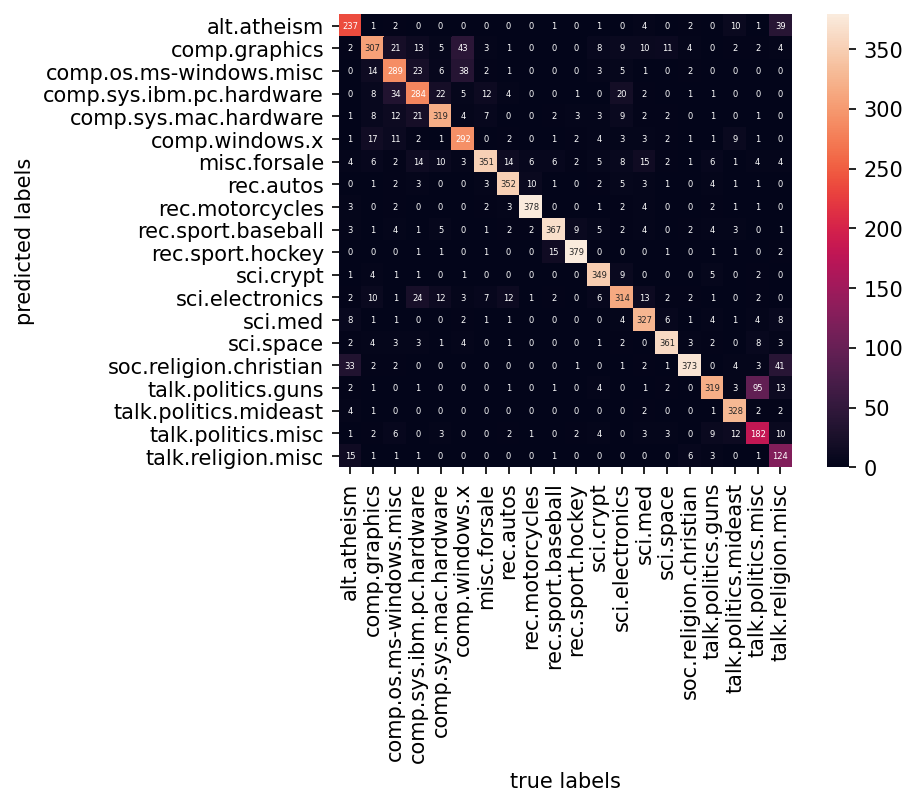

In [40]:
import matplotlib
matplotlib.rcParams['figure.dpi']= 150

sns.heatmap(mat.T, square=True, annot=True, fmt="d",
           xticklabels=test_data.target_names,
           yticklabels=test_data.target_names,
           annot_kws={"size":4})
plt.xlabel("true labels")
plt.ylabel("predicted labels")
plt.show()

## Fine-Tune Hyperparameters

- Grid Search
- Cross Validation

## References

- [Text Classification Using Naive Bayes: Theory & A Working Example](https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a)